### An example of agent-based modeling of token economics.
Ripped from: https://crowdforangels.com/pdf/Agent-Based-Model.pdf

In [61]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, pandas, matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 16.7.0 x86_64 i386 64bit
numpy 1.13.3
pandas 0.21.0
matplotlib 2.1.0
Mon Apr 23 11:27:22 2018 PDT

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
n_users = 1500

# Exchange rate
token_to_usd = 0.01

# Rate company must pay back in fees (in USD)
rate_usd = 0.01
active_users_percentage = 0.1

In [34]:
def user_lottery(users_starting, amount):
    k = True
    users=users_starting.copy()
    
    while k:
        winner = np.random.randint(0, len(users))
        
        if users[winner] >= amount:
            users[winner] = users[winner]-amount
            k = False
        else:
            amount = amount - users[winner]
            users[winner] = 0
    
    return users

In [51]:
def run_sim(users_tokens, companies_round, token_to_usd, rate_usd, active_users_percentage = active_users_percentage, noise_chance = 0.01):
    initial_users = users_tokens.copy()
    iteration = 0
    rates = []
    for company in companies_round:
        if np.random.rand() < noise_chance:
            dummy = token_to_usd + np.random.normal(token_to_usd, token_to_usd / 1) * np.sign(np.random.normal())
#             print(dummy)
            if dummy > 0.01:
                token_to_usd = dummy
        usd_required = rate_usd * company
        tokens_required = usd_required / token_to_usd
            
        indices = np.random.permutation(len(users_tokens))
        indices = indices[:int(len(users_tokens)*active_users_percentage)]
        active_users = users_tokens[indices]
            
        if tokens_required > active_users.sum():
            if active_users.sum() == 0.0:
                active_users = users_tokens
                indices = np.arange(0, len(users_tokens))
                    
            token_to_usd = usd_required / active_users.sum()
            tokens_required = usd_requred / token_to_usd
        else:
            active_users = user_lottery(active_users, tokens_required)
            users_tokens[indices] = active_users
            
        iteration += 1
        rates.append(token_to_usd)
            
    profit = (initial_users - users_tokens) * token_to_usd
        
    return initial_users, users_tokens, profit, token_to_usd, rates

In [52]:
profits = []
users = []
pti = []
rates = []
rates_h = []
for i in range(0,1000):
#     print('running iteration :'+str(i))
    k=np.random.power(0.1,n_users)*95000+5000
    users_tokens_initial = k*95
    companies_y1 = [250000]*100+[500000]*30+[1000000]*10
    companies_y2 = [250000]*120+[500000]*40+[1000000]*13+[2000000]*1
    companies_y3 = [250000.0]*150+[500000.0]*65+[1000000]*18+[2000000]*12
    companies_y4 = [250000]*200+[500000]*100+[1000000]*52+[2000000]*20
    companies_y5 = [250000]*600+[500000]*400+[1000000]*200+[2000000]*125

In [53]:
companies_round = np.array(companies_y1 + companies_y2 + companies_y3 + companies_y4 + companies_y5)
initial_users, users_tokens, profit, final_token_to_usd, rates_history = run_sim(users_tokens_initial.copy(), companies_round, token_to_usd, rate_usd, active_users_percentage = active_users_percentage)

In [54]:
profits.append(profit)
print("\nInitial token distribution among users")
print(initial_users)


Initial token distribution among users
[ 475042.14652947  764262.12896655  475023.68831861 ...,  530455.67448169
  654672.29745271  584884.38015351]


In [55]:
print("\nFinal token distribution after {0} investment rounds".format(len(companies_round)))
print(users_tokens)
users.append(users_tokens_initial)


Final token distribution after 2256 investment rounds
[      0.               0.               0.         ...,  530455.67448169
  356482.73080352  578444.97782529]


In [56]:
print("\nTotal profit per user in USD is " +str(profit))
print("\nAverage profit is " +str(np.mean(profit)))


Total profit per user in USD is [  7628252.98309544  12272563.40884334   7627956.58012774 ...,         0.
   4788344.50361454    103404.27765918]

Average profit is 3985846.52016


In [57]:
profit_to_initial = profit / users_tokens_initial
pti.append(profit_to_initial)

In [58]:
print("\nFinal rate is "+str(final_token_to_usd))
rates.append(final_token_to_usd)


Final rate is 16.0580551406


In [59]:
rates_h.append(rates_history)

Text(0,0.5,'value in USD')

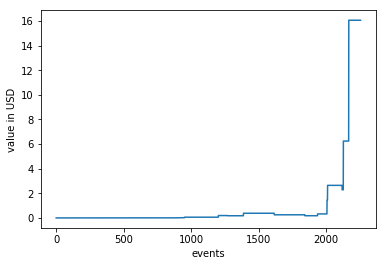

In [60]:
k = pd.DataFrame(rates_h)
k.median().plot()
plt.xlabel('events')
plt.ylabel('value in USD')